# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Danni Dwicahyo
- Email: dannidwicahyo@gmail.com
- Id Dicoding: Danni Dwicahyo

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import os
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.utils import resample, shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Menyiapkan data yang akan digunakan

In [2]:
!wget https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv

df = pd.read_csv("data.csv", sep=";")
df.head()

--2025-05-15 02:18:27--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528772 (516K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 516.38K  --.-KB/s    in 0.03s   

2025-05-15 02:18:27 (14.5 MB/s) - ‘data.csv’ saved [528772/528772]



,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

All data has no missing values and already has numerical values, except 'Status' column

In [4]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


There is no suspicious in the data

In [5]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


### Exploratory Data Analysis

array([[<Axes: title={'center': 'Marital_status'}>,
        <Axes: title={'center': 'Application_mode'}>,
        <Axes: title={'center': 'Application_order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime_evening_attendance'}>,
        <Axes: title={'center': 'Previous_qualification'}>],
       [<Axes: title={'center': 'Previous_qualification_grade'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': 'Mothers_qualification'}>,
        <Axes: title={'center': 'Fathers_qualification'}>,
        <Axes: title={'center': 'Mothers_occupation'}>,
        <Axes: title={'center': 'Fathers_occupation'}>],
       [<Axes: title={'center': 'Admission_grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational_special_needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition_fees_up_to_date'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Ax

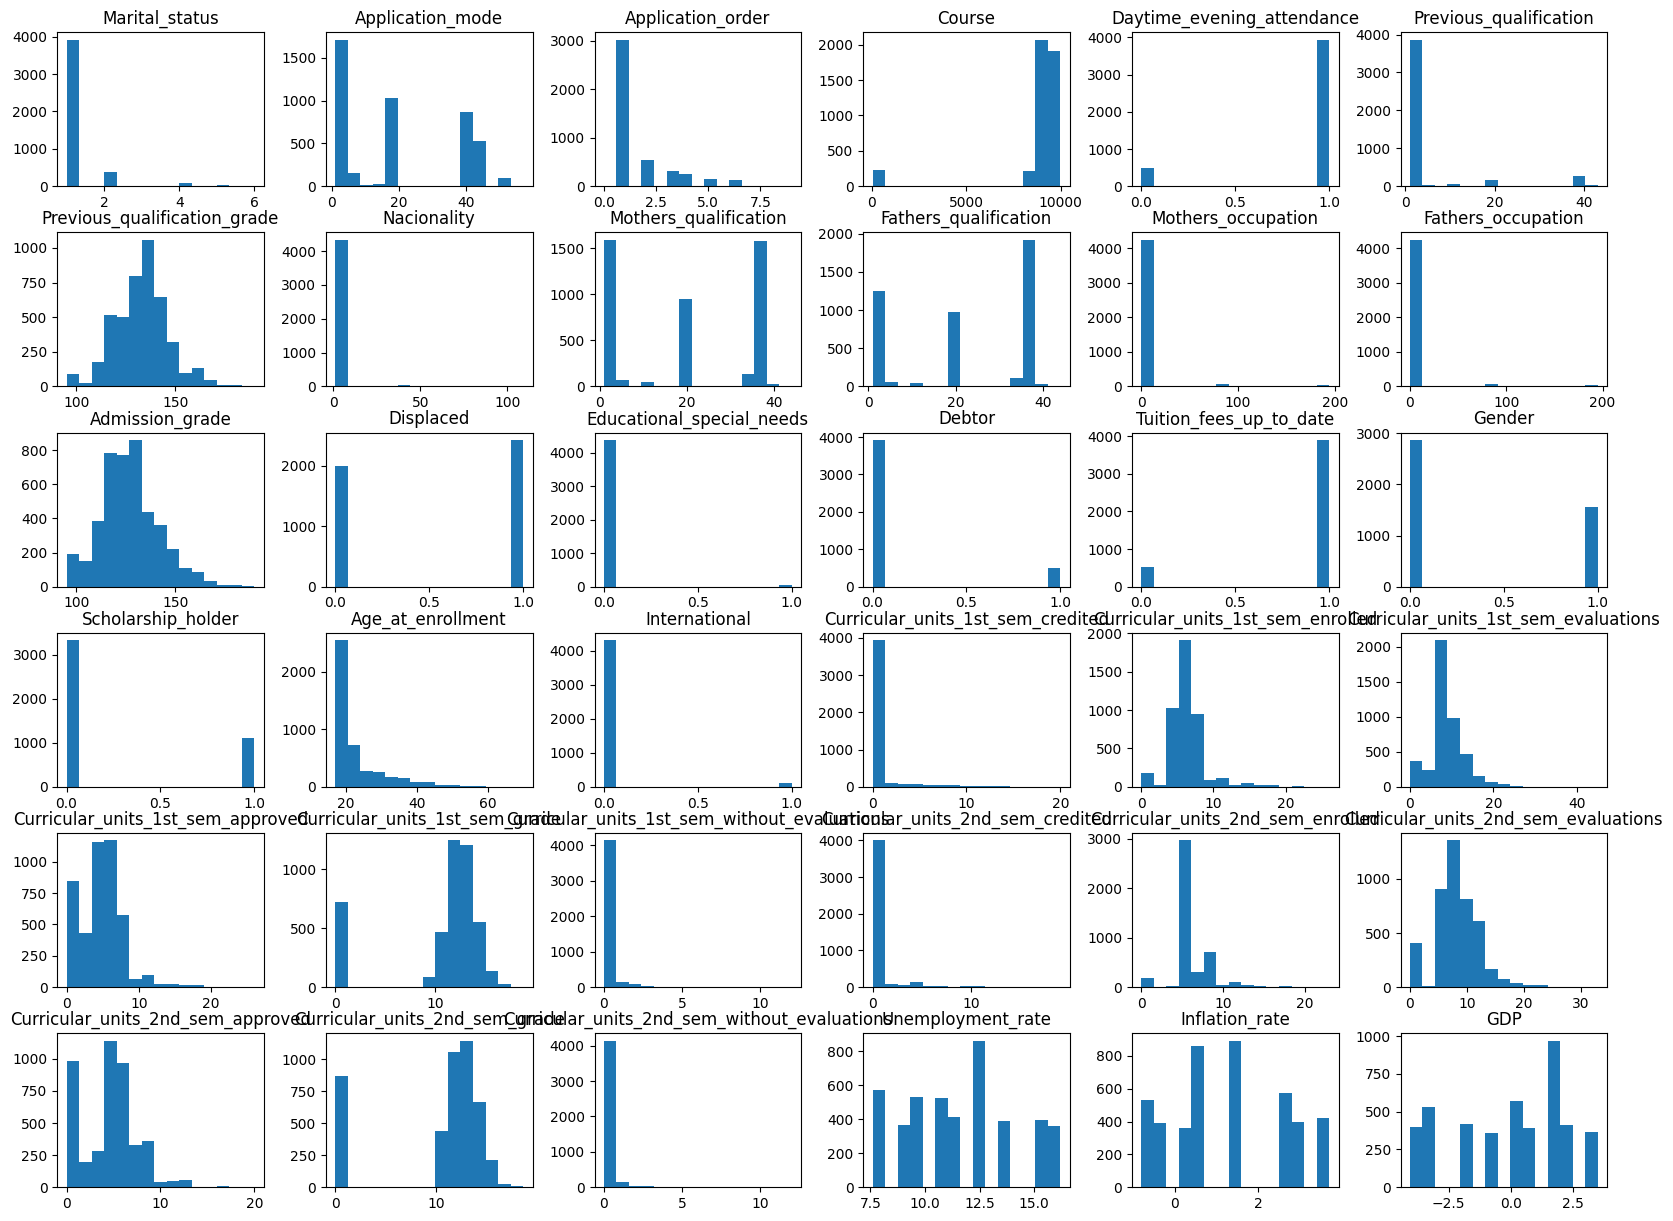

In [6]:
df.hist(bins=15, grid=False, figsize=(20,15))

Based on histogram graphs above, even though parameters already in numerical values, several columns can be classified as categorical values, such as Daytime_evening_attendance, Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Gender, Scholarship_holder, International

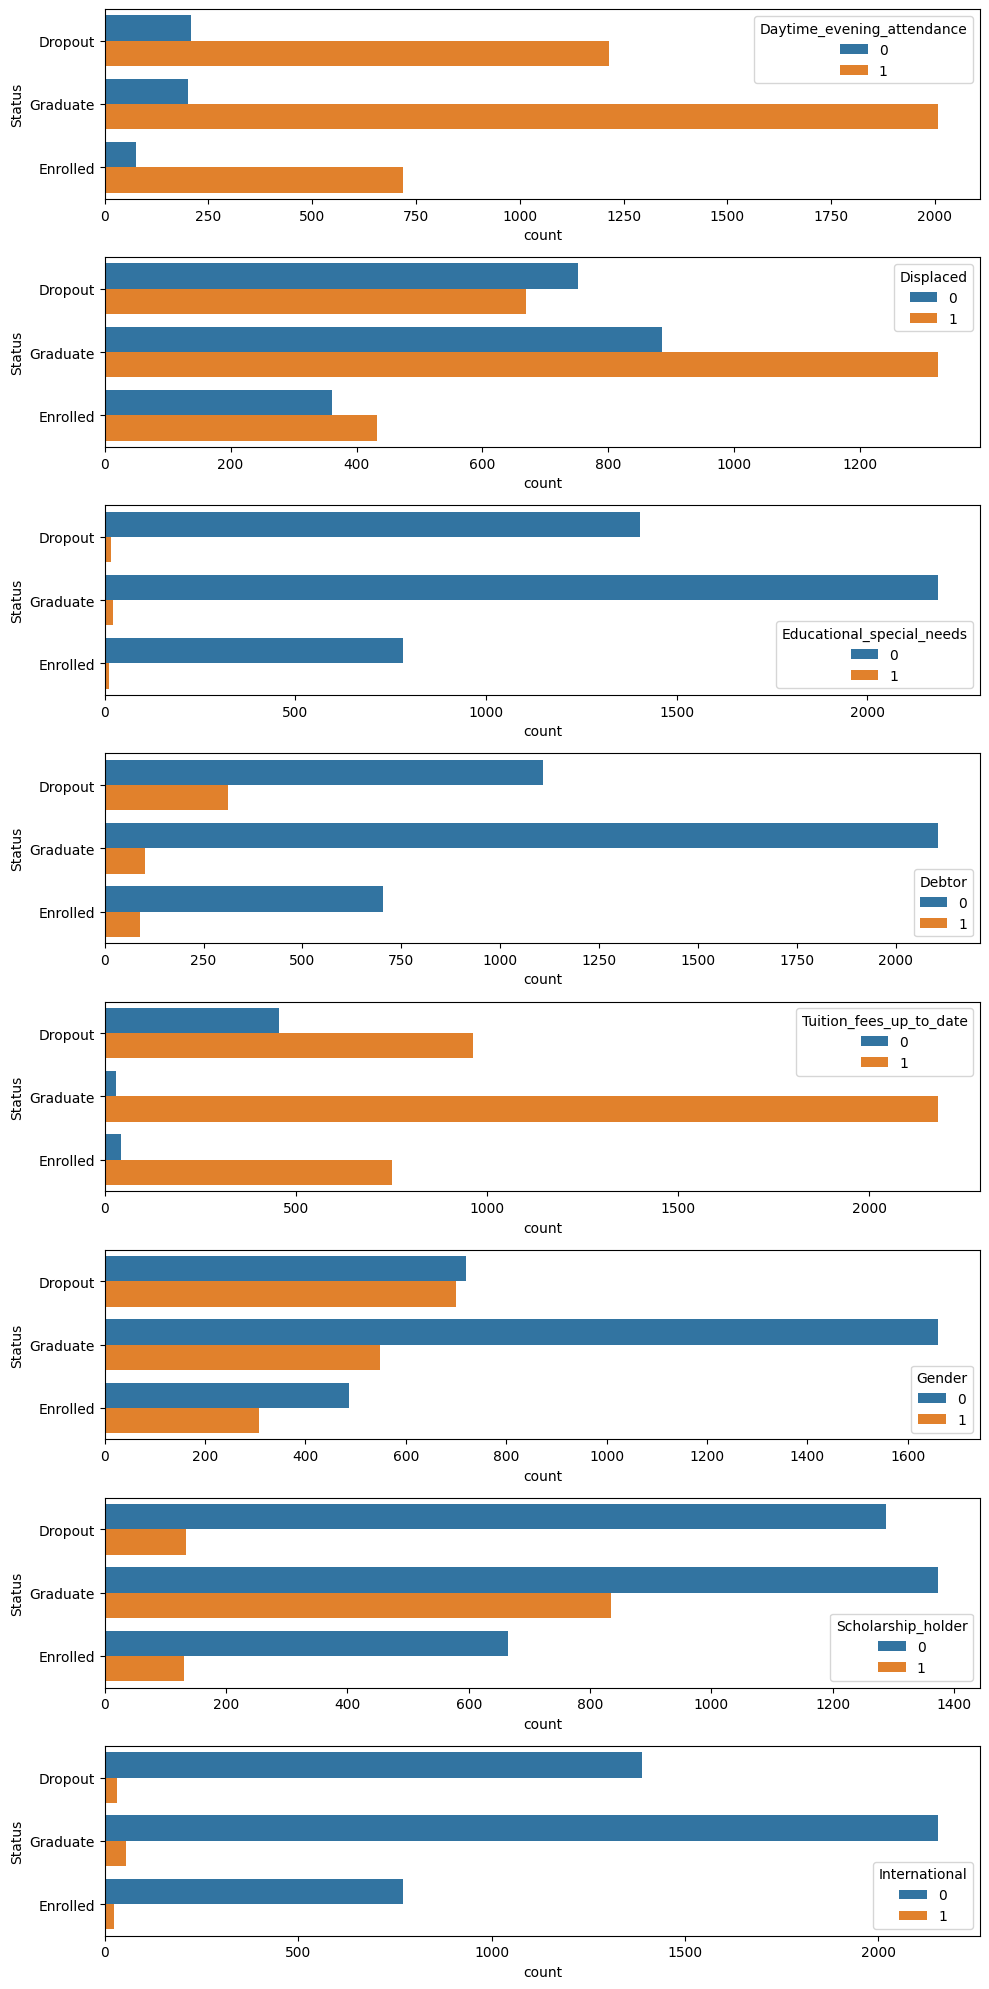

In [7]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_cols = ['Daytime_evening_attendance', 'Displaced', 'Educational_special_needs', 'Debtor',
                    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']

categorical_plot(
    features=categorical_cols,
    df=df,
    segment_feature="Status"
)

Based on bar chart above, Dropout students tend to be Debtor where their Tuition are not up to date, in addition they may not a scholarship holder. It sums up that students who have financial problem is more prone to Dropout

['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


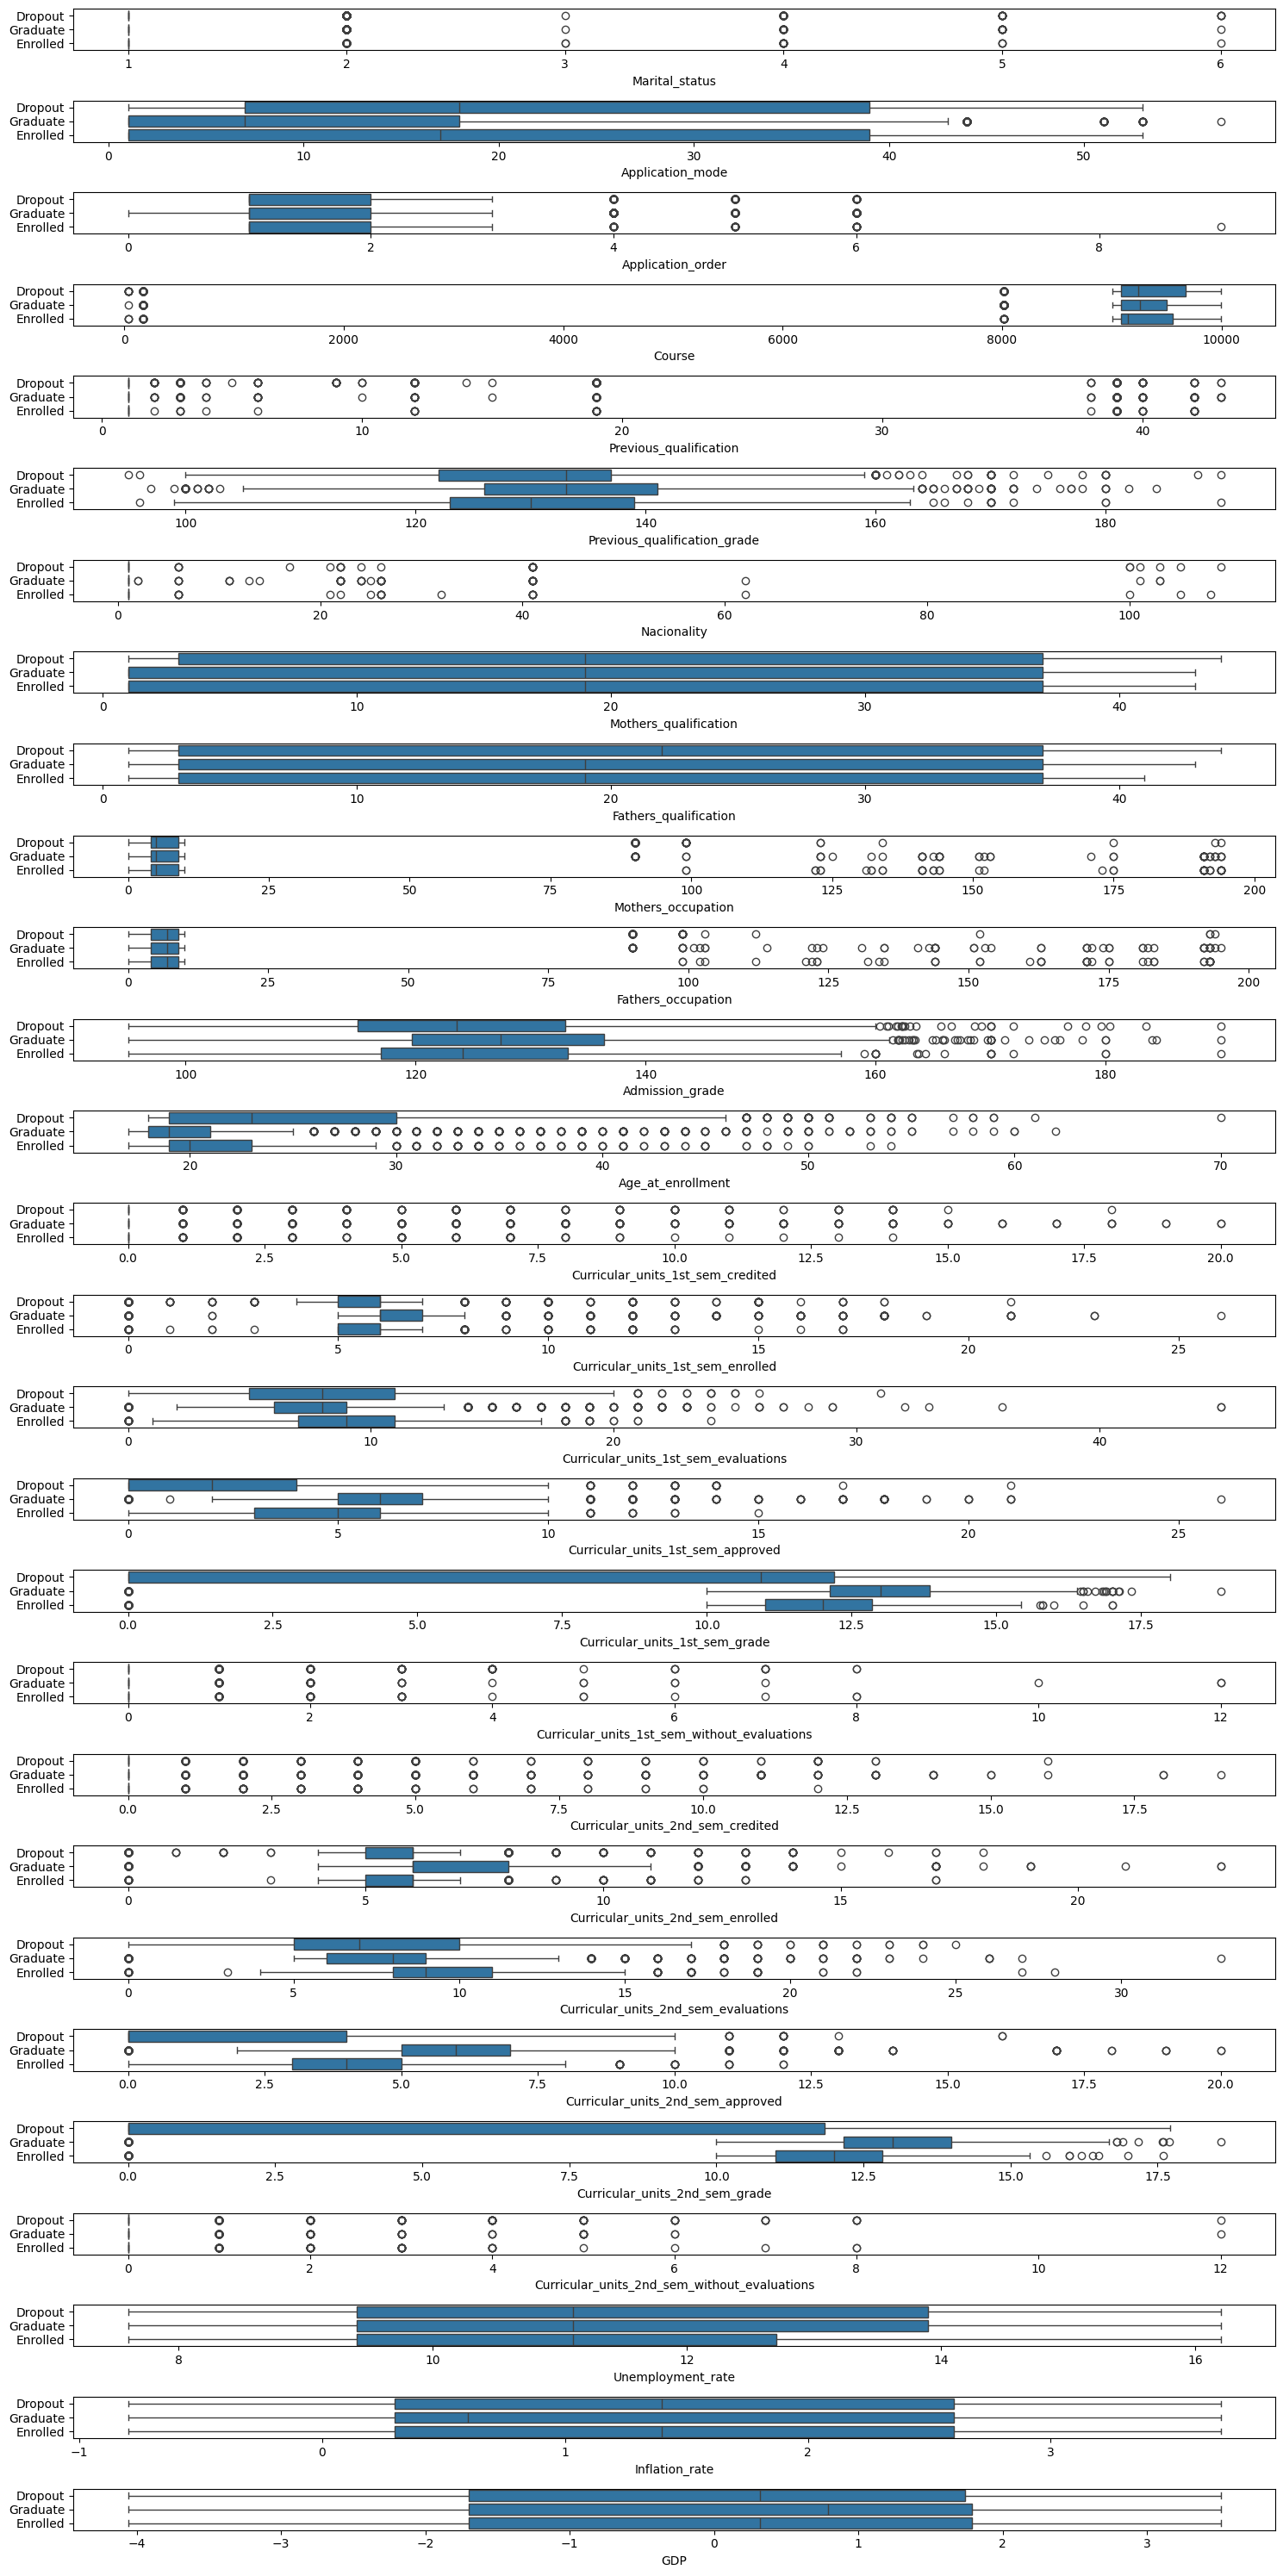

In [8]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_cols = df.drop(columns=categorical_cols+['Status']).columns.to_list()
print(numerical_cols)

numerical_dis_plot(
    features=numerical_cols,
    df=df,
    segment_feature="Status"
)

Based on the box plot above, Dropout students have higher average age at enrollment than the graduated ones. In addition, grades from both semesters are lower than the graduates ones which is indicating that the those grades can be used as an early detection.

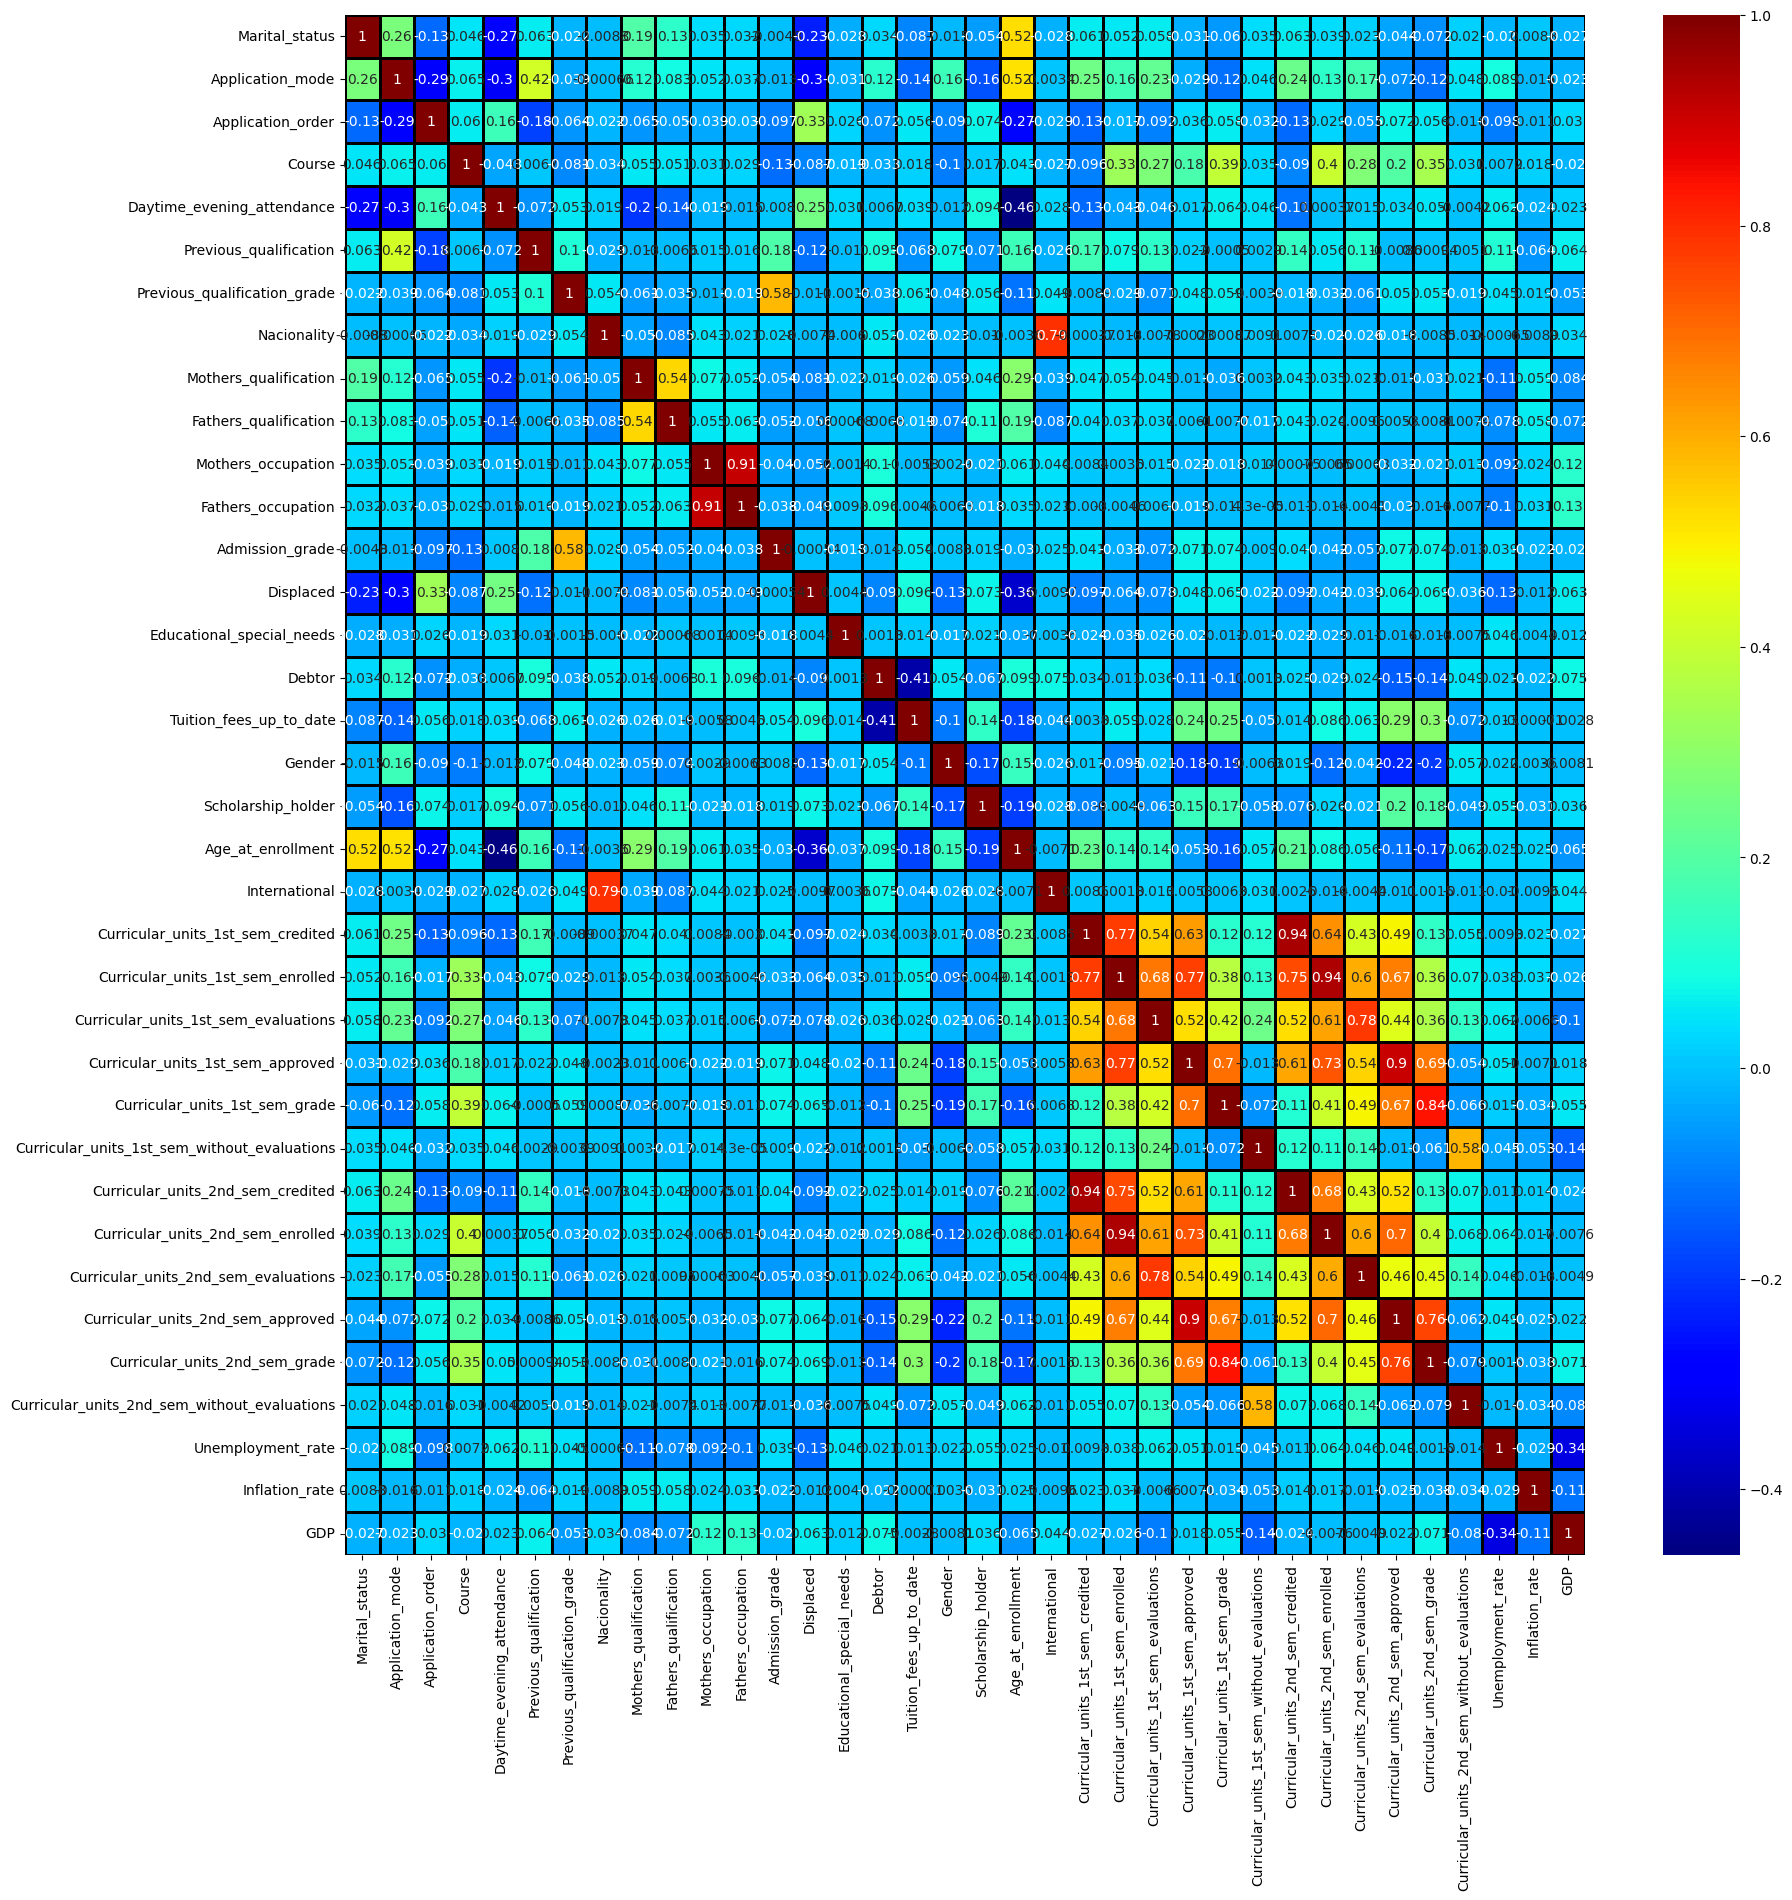

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Based on the heatmap above, it shows that several parameters have multicolinearity with each others, such as:
- age at enrollment with marital status and application mode
- admission grade and previous qualitification grade
- fathers qualification and mothers qualification
- fathers occupation and mothers occupation
- curricular units credited, enrolled, evaluated, approved, and grade in both semesters

## Data Preparation / Preprocessing

Exclude enrolled students for deployment.
Convert Status column to DropOut column.

In [10]:
df[df['Status'] == 'Enrolled'].to_csv("enrolled_students.csv", index=False)
df = df[df['Status'] != 'Enrolled']
df['Dropout'] = (df['Status'] == 'Dropout').astype('int')
df.drop(columns=['Status'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   int64 

Train-test Split

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(2904, 37)
(726, 37)


Undersampling

In [12]:
train_df.Dropout.value_counts()

,count
Dropout,
0,1760
1,1144


In [13]:
df_majority = train_df[(train_df.Dropout == 0)]
df_minority = train_df[(train_df.Dropout == 1)]

print(len(df_majority))
print(len(df_minority))

1760
1144


In [14]:
df_majority_undersampled = resample(df_majority, n_samples=len(df_minority), random_state=42)
print(df_majority_undersampled.shape)

(1144, 37)


In [15]:
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Dropout
1279,1,1,1,171,1,1,133.1,1,38,37,...,0,0,0,0,0.000000,0,12.7,3.7,-1.70,1
1138,1,17,1,9130,1,1,157.0,1,3,2,...,0,6,8,5,15.166667,0,13.9,-0.3,0.79,1
1141,1,17,1,9130,1,1,145.0,1,38,37,...,0,5,5,5,13.200000,0,10.8,1.4,1.74,0
1186,4,39,1,9238,1,1,120.0,1,37,37,...,0,6,7,5,14.800000,0,12.7,3.7,-1.70,0
1629,1,39,1,9773,1,19,133.1,1,19,19,...,0,6,6,0,0.000000,0,11.1,0.6,2.02,1


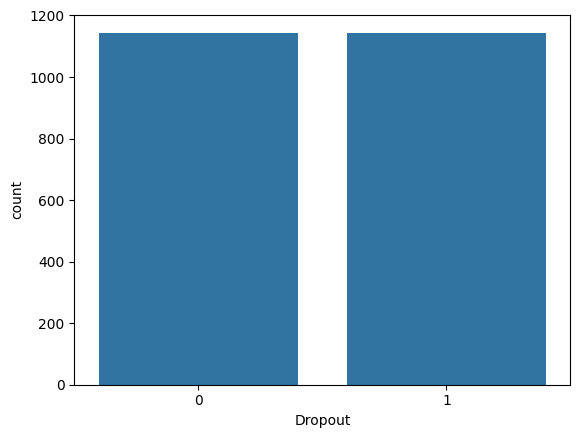

In [16]:
sns.countplot(data=undersampled_train_df, x="Dropout")
plt.show()

Scaling


In [17]:
X_train = undersampled_train_df.drop(columns="Dropout", axis=1)
y_train = undersampled_train_df["Dropout"]

X_test = test_df.drop(columns="Dropout", axis=1)
y_test = test_df["Dropout"]

In [18]:
try:
  os.mkdir('model')
except:
  print("Folder already exist!")

In [19]:
df = X_train.copy()
df_test = X_test.copy()
for feature in df.columns:
    scaler = MinMaxScaler()
    X = np.asanyarray(df[feature])
    X = X.reshape(-1,1)
    scaler.fit(X)
    df["{}".format(feature)] = scaler.transform(X)
    joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

    X_test = np.asanyarray(df_test[feature])
    X_test = X_test.reshape(-1,1)
    df_test["{}".format(feature)] = scaler.transform(X_test)

new_train_df, new_test_df = df, df_test

### Principal Component Analysis (PCA)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                2288 non-null   float64
 1   Application_mode                              2288 non-null   float64
 2   Application_order                             2288 non-null   float64
 3   Course                                        2288 non-null   float64
 4   Daytime_evening_attendance                    2288 non-null   float64
 5   Previous_qualification                        2288 non-null   float64
 6   Previous_qualification_grade                  2288 non-null   float64
 7   Nacionality                                   2288 non-null   float64
 8   Mothers_qualification                         2288 non-null   float64
 9   Fathers_qualification                         2288 non-null   f

In [21]:
pca_academic_columns = ['Course', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
                        'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
                        'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                        'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
                        'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
                        'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations']

pca_parents_columns = ['Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation']

In [22]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

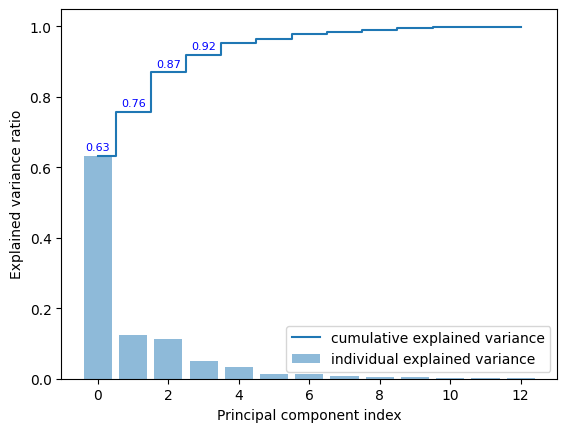

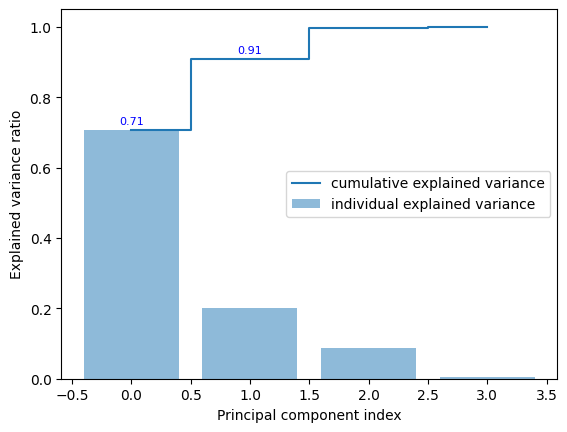

In [23]:
def PCA_variance(train_pca_df, pca_numerical_columns):
    pca = PCA(n_components=len(pca_numerical_columns), random_state=123)
    pca.fit(train_pca_df[pca_numerical_columns])
    princ_comp = pca.transform(train_pca_df[pca_numerical_columns])

    var_exp = pca.explained_variance_ratio_.round(3)
    cum_var_exp = np.cumsum(var_exp)

    plt.bar(range(len(pca_numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(len(pca_numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
    for i, cv in enumerate(cum_var_exp):
      if cv > 0.95: break
      plt.text(i, cv + 0.01, str(cv.round(2)), ha='center', va='bottom', fontsize=8, color='blue')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.show()

PCA_variance(train_pca_df, pca_academic_columns)
PCA_variance(train_pca_df, pca_parents_columns)

In [24]:
def PCA_transform(train_pca_df, test_pca_df, pca_numerical_columns, n_components, name):
    pca = PCA(n_components=n_components, random_state=123)
    pca.fit(train_pca_df[pca_numerical_columns])
    joblib.dump(pca, f"model/{name}.joblib")
    princ_comp_1 = pca.transform(train_pca_df[pca_numerical_columns])
    cols = [f"{name}_{i}" for i in range(1,n_components+1)]
    train_pca_df[cols] = pd.DataFrame(princ_comp_1, columns=cols)
    train_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)

    test_princ_comp = pca.transform(test_pca_df[pca_numerical_columns])
    test_pca_df[cols] = pd.DataFrame(test_princ_comp, columns=cols)
    test_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)

    return train_pca_df, test_pca_df

train_pca_df, test_pca_df = PCA_transform(train_pca_df, test_pca_df, pca_academic_columns, 4, "pca_academic")
train_pca_df, test_pca_df = PCA_transform(train_pca_df, test_pca_df, pca_parents_columns, 2, "pca_parents")
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Admission_grade,Displaced,Educational_special_needs,...,International,Unemployment_rate,Inflation_rate,GDP,pca_academic_1,pca_academic_2,pca_academic_3,pca_academic_4,pca_parents_1,pca_parents_2
0,0.0,0.000000,0.0,1.0,0.0,0.531915,0.0,0.573684,1.0,0.0,...,0.0,0.406977,0.311111,0.803170,0.364280,-0.127434,0.035252,0.026277,-0.667309,-0.047245
1,0.0,0.307692,0.0,1.0,0.0,0.319149,0.0,0.223158,0.0,0.0,...,0.0,0.000000,0.755556,0.578600,0.062695,-0.114515,0.054748,0.042738,-0.667184,-0.047255
2,0.2,0.788462,0.0,1.0,0.0,0.425532,0.0,0.368421,1.0,0.0,...,0.0,0.000000,0.755556,0.578600,0.197082,0.057812,0.013221,0.067302,-0.601813,-0.056777
3,0.2,0.788462,0.0,1.0,0.0,0.787234,0.0,0.563158,0.0,0.0,...,0.0,0.209302,0.000000,0.124174,0.438714,0.282257,-0.149230,0.034433,0.320198,-0.224919
4,0.0,0.807692,0.0,1.0,0.0,0.404255,0.0,0.052632,1.0,0.0,...,0.0,0.732558,0.111111,0.640687,-0.917859,0.086152,-0.668326,0.133234,0.513444,-0.023902


In [25]:
train_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital_status                2288 non-null   float64
 1   Application_mode              2288 non-null   float64
 2   Application_order             2288 non-null   float64
 3   Daytime_evening_attendance    2288 non-null   float64
 4   Previous_qualification        2288 non-null   float64
 5   Previous_qualification_grade  2288 non-null   float64
 6   Nacionality                   2288 non-null   float64
 7   Admission_grade               2288 non-null   float64
 8   Displaced                     2288 non-null   float64
 9   Educational_special_needs     2288 non-null   float64
 10  Debtor                        2288 non-null   float64
 11  Tuition_fees_up_to_date       2288 non-null   float64
 12  Gender                        2288 non-null   float64
 13  Sch

## Modeling

Decision Tree

In [26]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 8, 10],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, y_train)

print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


In [27]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion=CV_tree.best_params_['criterion'],
    max_depth=CV_tree.best_params_['max_depth'],
    max_features=CV_tree.best_params_['max_features']
)

tree_model.fit(train_pca_df, y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

Random Forest

In [28]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 8, 10],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, y_train)

print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [29]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=CV_rdf.best_params_['max_depth'],
    n_estimators=CV_rdf.best_params_['n_estimators'],
    max_features=CV_rdf.best_params_['max_features'],
    criterion=CV_rdf.best_params_['criterion'],
    n_jobs=-1
)
rdf_model.fit(train_pca_df, y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

Gradient Boosting


In [30]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, y_train)

print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}


In [31]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=CV_gboost.best_params_['learning_rate'],
    max_depth=CV_gboost.best_params_['max_depth'],
    max_features=CV_gboost.best_params_['max_features'],
    n_estimators=CV_gboost.best_params_['n_estimators']
)
gboost_model.fit(train_pca_df, y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

XGBoost

## Evaluation

In [32]:
def evaluating(y_pred, y_true):
    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true)
    confusion_matrix_df = pd.DataFrame(cnf_matrix)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       449
           1       0.77      0.81      0.79       277

    accuracy                           0.83       726
   macro avg       0.82      0.83      0.83       726
weighted avg       0.84      0.83      0.84       726



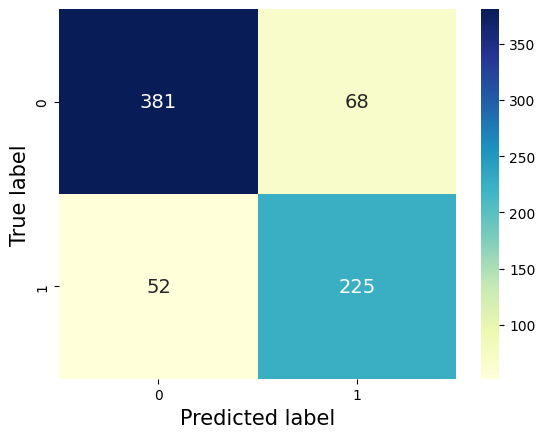

,0,1
0,381,68
1,52,225


In [33]:
y_pred_test = tree_model.predict(test_pca_df)
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       449
           1       0.87      0.84      0.86       277

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726



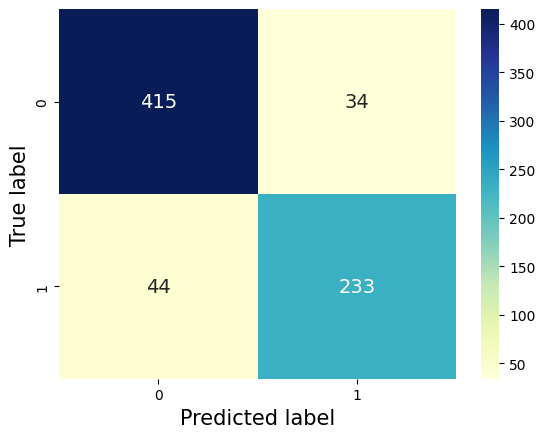

,0,1
0,415,34
1,44,233


In [34]:
y_pred_test = rdf_model.predict(test_pca_df)
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       449
           1       0.83      0.88      0.85       277

    accuracy                           0.89       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



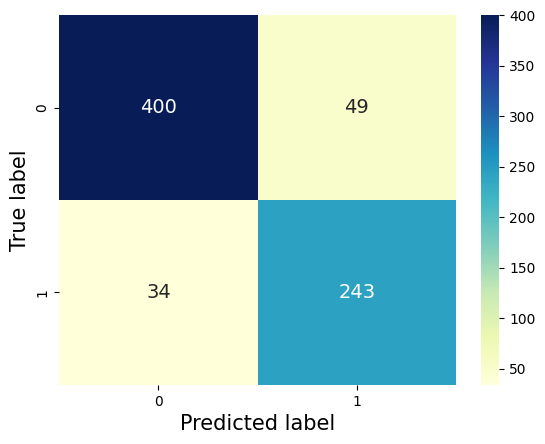

,0,1
0,400,49
1,34,243


In [35]:
y_pred_test = gboost_model.predict(test_pca_df)
evaluating(y_pred=y_pred_test, y_true=y_test)

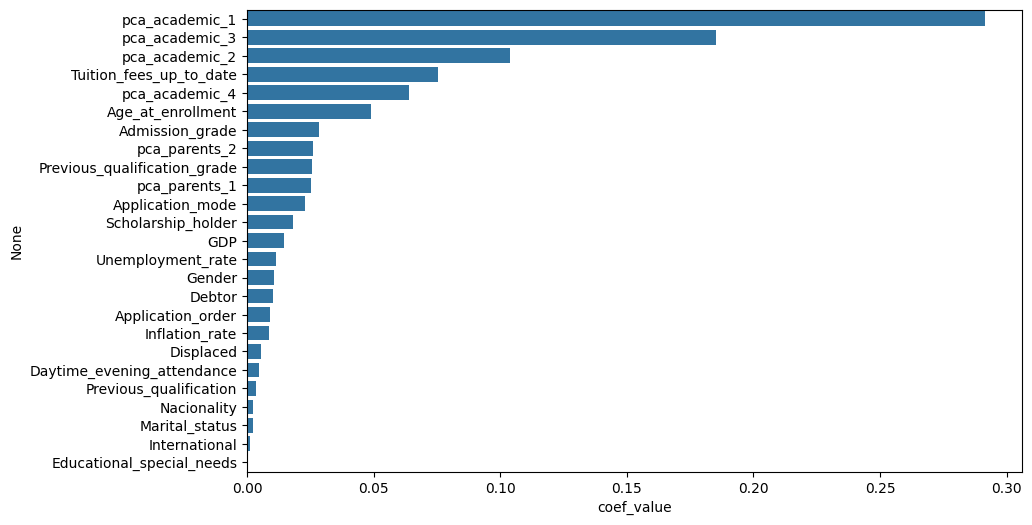

,coef_value
pca_academic_1,0.291490
pca_academic_3,0.185243
pca_academic_2,0.103780
Tuition_fees_up_to_date,0.075597
pca_academic_4,0.064082
Age_at_enrollment,0.048883
Admission_grade,0.028347
pca_parents_2,0.025954
Previous_qualification_grade,0.025469
pca_parents_1,0.025435


In [36]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)

In [37]:
def load_pca_component(name):
    pca = joblib.load(f"model/{name}.joblib")
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'{name}_{i+1}' for i in range(pca.n_components_)],
        index=pca.feature_names_in_
    )

    for comp in loadings.columns:
        print(f"\nTop contributors to {comp}:")
        print(loadings[comp].abs().sort_values(ascending=False).head(5))

load_pca_component("pca_academic")
load_pca_component("pca_parents")


Top contributors to pca_academic_1:
Curricular_units_2nd_sem_grade       0.645488
Curricular_units_1st_sem_grade       0.577596
Curricular_units_2nd_sem_approved    0.285334
Curricular_units_1st_sem_approved    0.219077
Course                               0.190317
Name: pca_academic_1, dtype: float64

Top contributors to pca_academic_2:
Curricular_units_1st_sem_credited       0.438434
Curricular_units_2nd_sem_credited       0.397775
Curricular_units_1st_sem_evaluations    0.359524
Curricular_units_1st_sem_enrolled       0.337304
Curricular_units_2nd_sem_grade          0.321861
Name: pca_academic_2, dtype: float64

Top contributors to pca_academic_3:
Course                               0.909971
Curricular_units_1st_sem_credited    0.213107
Curricular_units_2nd_sem_approved    0.196716
Curricular_units_2nd_sem_credited    0.187429
Curricular_units_2nd_sem_grade       0.150255
Name: pca_academic_3, dtype: float64

Top contributors to pca_academic_4:
Curricular_units_1st_sem_grade      

In [38]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/scaler_Unemployment_rate.joblib (deflated 40%)
  adding: model/scaler_Inflation_rate.joblib (deflated 40%)
  adding: model/scaler_Fathers_occupation.joblib (deflated 44%)
  adding: model/scaler_Course.joblib (deflated 40%)
  adding: model/scaler_Admission_grade.joblib (deflated 42%)
  adding: model/scaler_Curricular_units_2nd_sem_grade.joblib (deflated 41%)
  adding: model/tree_model.joblib (deflated 66%)
  adding: model/scaler_Curricular_units_2nd_sem_credited.joblib (deflated 43%)
  adding: model/scaler_Curricular_units_1st_sem_evaluations.joblib (deflated 43%)
  adding: model/scaler_Previous_qualification_grade.joblib (deflated 41%)
  adding: model/scaler_Curricular_units_1st_sem_enrolled.joblib (deflated 43%)
  adding: model/scaler_Curricular_units_1st_sem_approved.joblib (deflated 43%)
  adding: model/scaler_Age_at_enrollment.joblib (deflated 40%)
  adding: model/scaler_Fathers_qualification.joblib (deflated 42%)
  adding: model/scaler_